In [1]:
from submodulos.tokenizer.custom_tokenizer import SpacyCustomTokenizer
from submodulos.data import get_all_text_with_details 
from submodulos.data.telegram import get_details_text
from tools import get_progressbar
from datetime import datetime
import os

texts = get_all_text_with_details(f'{os.getcwd()}/submodulos/data/')

/Users/dany/.local/share/virtualenvs/cuba-digital-lang-9Kd57kqM/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
def sorted_by_dict(d):
    result = [(key, d[key] )for key in d]
    result.sort(key= lambda x: x[1], reverse= True)
    return result

def print_best_word(list_):
    for i in range(20):
        print(list_[i], end=' ')

def total_len(d):
    return sum([d[key] for key in d])

def count(tokens, predicate, name= ' count any feature ', map_= lambda x: x.text):
    bar = get_progressbar(len(tokens), name)

    result = {}
    bar.start()
    for i, t in enumerate(tokens):
        if not predicate(t): continue
        try: result[map_(t)] += 1
        except: result[map_(t)] = 1
        bar.update(i + 1)
    bar.finish()

    return result

def density_time(tokens, predicate, name= ' count any feature '):
    bar = get_progressbar(len(tokens), name)

    result = {}
    bar.start()
    for i, t in enumerate(tokens):
        if not predicate(t): continue
        date = str(datetime.strptime(t.data.split(' ')[0], '%Y-%m-%d'))
        try: result[date][t.text.lower()] += 1
        except KeyError: 
            try: result[date][t.text.lower()] = 1
            except KeyError: 
                result[date] = {}
                result[date][t.text.lower()] = 1
            
        bar.update(i + 1)
    bar.finish()

    return result

def density_text_by_time(texts, name= ' count any feature '):
    bar = get_progressbar(len(texts), name)

    result = {}
    bar.start()
    for i, t in enumerate(texts):
        t, d, _ = t
        date = str(datetime.strptime(d.split(' ')[0], '%Y-%m-%d'))
        try: result[date] += 1
        except KeyError: 
            result[date] = 1
            
        bar.update(i + 1)
    bar.finish()

    return result


In [2]:
text_list = {
    'CubaDebate': 0,
    'Facebook': 0,
    'Twitter': 0,
    'Telegram': 0
}

for t, d, n in texts:
    text_list[n] += 1

text_list

{'CubaDebate': 9026, 'Facebook': 287, 'Twitter': 109941, 'Telegram': 156440}

In [19]:
nlp = SpacyCustomTokenizer()
bar = get_progressbar(len(texts), f' from {len(texts)} text, tokenizer and tag with date ')
bar.start()
token_list = []
for i, data in enumerate(texts):
    t, d, n = data
    for token in nlp(t):
        token.data = d
        token.source = n
        token_list.append(token)
    bar.update(i + 1)
bar.finish()

[##########################] from 177284 text, tokenizer and tag with date 100%


In [20]:
natural = count(token_list, lambda x : x.natural_word() and not x.is_stop, ' count natural word ', lambda x: x.text.lower())
print_best_word(sorted_by_dict(natural))

('vip', 53412) ('contraseña', 23434) ('audio', 23057) ('sinopsis', 22080) ('vence', 21777) ('español', 21388) ('género', 21305) ('bot', 21106) ('canal', 19260) ('nombre', 17408) ('tamaño', 15558) ('caps', 15344) ('subtítulos', 15288) ('barcelona', 15062) ('temp', 14624) ('grupo', 14275) ('resubido', 13240) ('mb', 12450) ('q', 11948) ('años', 11554) 

In [21]:
lemma = count(token_list, lambda x : x.natural_word() and not x.is_stop, ' count natural word ', lambda x: x.lemma.lower() if x.lemma != None else '')
print_best_word(sorted_by_dict(lemma))

('vip', 51732) ('contraseña', 23325) ('audio', 23066) ('sinopsis', 22080) ('español', 21903) ('vence', 21479) ('género', 21456) ('bot', 21149) ('canal', 19967) ('nombre', 17657) ('tamaño', 15577) ('caps', 15344) ('año', 15343) ('grupo', 14668) ('subtítulos', 14656) ('temp', 14624) ('barcelona', 14226) ('resubido', 13240) ('mb', 12450) ('serie', 12110) 

In [22]:
emojis = count(token_list, lambda x : x.is_emoji(), ' count emojis ')
print(total_len(emojis))
print_best_word(sorted_by_dict(emojis))

[###########################################################] count emojis 100%


856638
('📲', 96079) ('🤖', 41498) ('‼', 36668) ('⚜', 34960) ('🖥', 32738) ('❗', 23254) ('📣', 21547) ('📝', 21509) ('🔑', 21274) ('🎭', 19236) ('🔊', 17876) ('🕐', 17346) ('💬', 16946) ('🎬', 16942) ('📼', 16876) ('📀', 14784) ('💎', 14673) ('✅', 12884) ('❤', 12240) ('🔱', 11844) 

In [23]:
date = count(token_list, lambda x : x.is_date() and not x.natural_word() and not x.is_symbol)
print(total_len(date))
print_best_word(sorted_by_dict(date))

[######################################################] count any feature 100%


23662
('00pm', 2332) ('30pm', 1053) ('0-0', 970) ('1-2', 728) ('00am', 709) ('45pm', 590) ('1-0', 584) ('mp4', 528) ('0-1', 526) ('11pm', 497) ('1-1', 487) ('1914-1918', 416) ('5-6', 397) ('4pm', 392) ('2-1', 322) ('3-4', 317) ('2pm', 279) ('9-10', 272) ('10pm', 261) ('20pm', 257) 

In [24]:
d = count(token_list, lambda x : x.is_digit())
print(total_len(d))
print_best_word(sorted_by_dict(d))

227916
('1', 20001) ('10', 13924) ('2', 12037) ('9', 11287) ('3', 10425) ('4', 7556) ('21', 7071) ('5', 6547) ('8', 5774) ('0', 5650) ('11', 5512) ('7', 5285) ('00', 5193) ('20', 4890) ('6', 4790) ('30', 4683) ('12', 4642) ('2021', 3196) ('15', 3143) ('09', 2684) 

In [25]:
d = count(token_list, lambda x : x.is_hashtag(), map_= lambda x: x.text.lower())
print(total_len(d))
print_best_word(sorted_by_dict(d))

[######################################################] count any feature 100%


16896
('#forçabarça', 712) ('#fcbarcelona', 648) ('#cuba', 594) ('#somosuh', 568) ('#somosfeu', 519) ('#koemanout', 300) ('#fcb', 294) ('#masia', 288) ('#gratis', 224) ('#vip', 224) ('#anime', 209) ('#elclásico', 180) ('#misterseitan', 152) ('#lalupa', 152) ('#dictadurafcb', 140) ('#goat', 136) ('#barçacelta', 128) ('#', 116) ('#barcelona', 112) ('#vamoscontodo', 111) 

In [26]:
d = count(token_list, lambda x : x.is_user_tag(), map_= lambda x: x.text.lower())
print(total_len(d))
print_best_word(sorted_by_dict(d))

[######################################################] count any feature 100%


153478
('@noticiasbarcelona', 48988) ('@s3spn', 44208) ('@s3youbot', 20240) ('@victornoel89', 3712) ('@curioseo', 1890) ('@lejandrosagua', 1488) ('@', 1319) ('@zona3dcuba', 1218) ('@reiniers94', 1072) ('@mailyn1993', 1056) ('@claudiaflores99', 1040) ('@dphoenixkirito', 864) ('@assiela90', 736) ('@zona3d', 574) ('@r_d_colomina', 512) ('@atds3', 502) ('@supers3plus', 496) ('@dayamy_amy', 416) ('@laligasan', 416) ('@theshowtimes3', 400) 

In [33]:
d = density_time(token_list, lambda x : x.natural_word() and not x.is_stop)
d_plus = density_text_by_time(texts) 

[######################################################] count any feature 100%
[######################################################] count any feature 100%


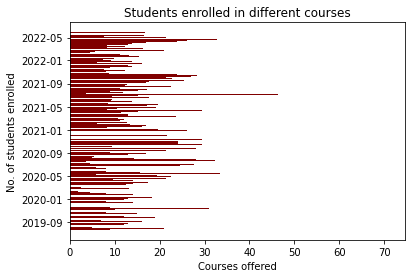

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
  
x = list(d.keys())
x.sort()
y = [total_len(d[key])/d_plus[key] for key in x]
  
 
# creating the bar plot
plt.barh(x, y, color ='maroon')
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [31]:
import json

with open('results/word-day.json', 'w+') as f:
    f.write(json.dumps(d))


with open('results/text-day.json', 'w+') as f:
    f.write(json.dumps(d_plus))